# Exploratory Data Analysis (EDA) on Economic Indicator
Created on February 24th, 2023. 

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries
2. Dataset Preparation
3. EDA

## Index 5: Chicago Fed National Financial Conditions Credit Subindex (NFCI)

### NFCI
The Chicago Fed’s National Financial Conditions Index (NFCI) provides a comprehensive weekly update on U.S. financial conditions in money markets, debt and equity markets and the traditional and “shadow” banking systems. It is actually a weighted average of 105 measures of financial activity 😳.

Source: http://www.chicagofed.org/webpages/publications/nfci/index.cfm.

Value:
- Positive: financial conditions are tighter than average (slower economic growth)
- Negative: financial conditions are looser than average (higher inflation)

### NFCI's Credit Subindex
3 subindexes of the NFCI:
- risk
- credit (this data) - measures of credit conditions (tighten/loosen)
- leverage

##1. Installation Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Upload Dataset file to the `IndexK` folder.
3. Do read_csv on your Dataset file.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
if os.getcwd() == '/content':
  os.chdir('drive/MyDrive/DataTeam1/Index5')

MessageError: ignored

In [ ]:
df = pd.read_csv('index-5-NFCICREDIT.csv') #Dataset file
df.head()

## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

Update meeting on March 2nd, 2023.

In [ ]:
df.describe()

,NFCICREDIT
count,2.720000e+03
mean,9.558824e-08
std,1.000000e+00
min,-2.553480e+00
25%,-3.027500e-01
50%,-1.074600e-01
75%,1.990750e-01
max,3.617660e+00


- No NaNs

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        2720 non-null   object 
 1   NFCICREDIT  2720 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.6+ KB


### 3.1 Plot

In [ ]:
# set to datetime object index so we can plot in various frequencies
index = pd.date_range(start='1971-01-08', end='2023-02-17', freq='W-FRI')
df.set_index(index, inplace=True)
df.head()

,DATE,NFCICREDIT
1971-01-08,1971-01-08,-1.90407
1971-01-15,1971-01-15,-1.90886
1971-01-22,1971-01-22,-1.91133
1971-01-29,1971-01-29,-1.91241
1971-02-05,1971-02-05,-1.91255


Text(0.5, 1.0, 'Weekly NFCI Credit')

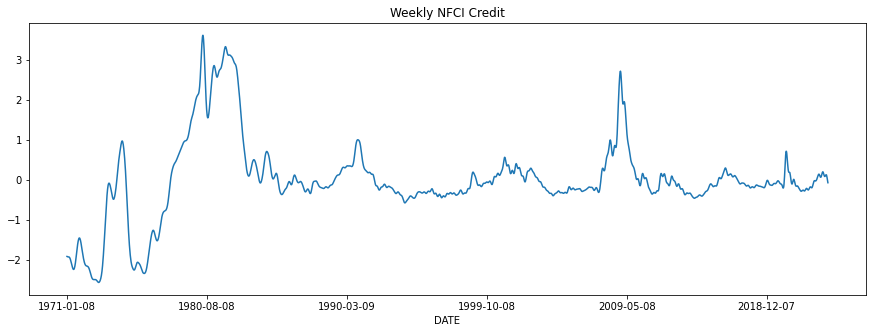

In [ ]:
# Weekly plot only (original data)
df.set_index('DATE')['NFCICREDIT'].plot(figsize=(15,5))
plt.title("Weekly NFCI Credit")

Not much different between each frequency?

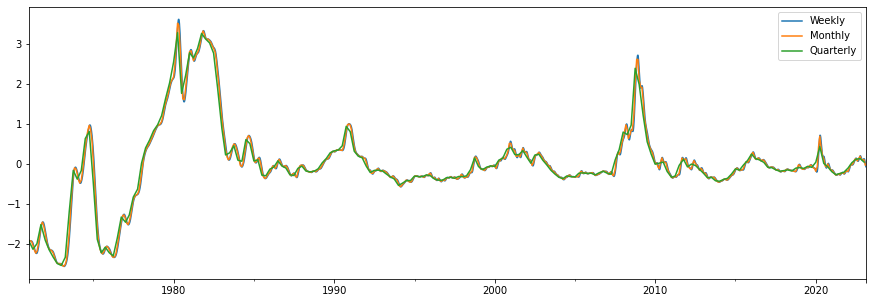

In [ ]:
# Plot from all data in weekly, monthly, quarterly
plot_whole = df['NFCICREDIT'].plot(figsize=(15,5), label="Weekly")
df['NFCICREDIT'].resample('M').mean().plot(figsize=(15,5), ax=plot_whole, label="Monthly")
df['NFCICREDIT'].resample('Q').mean().plot(figsize=(15,5), ax=plot_whole, label="Quarterly")
plt.legend()
plt.show()

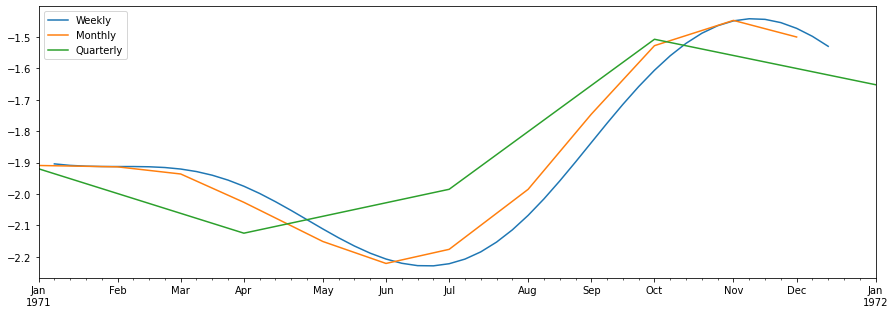

In [ ]:
# Plot from first 50+ data
plot_short = df['NFCICREDIT'][:50].plot(figsize=(15,5), label="Weekly")
df['NFCICREDIT'][:50].resample('M').mean().plot(figsize=(15,5), ax=plot_short, label="Monthly")
df['NFCICREDIT'][:53].resample('Q').mean().plot(figsize=(15,5), ax=plot_short, label="Quarterly")
plt.legend()
plt.show()

In [ ]:
# recession
# pct_change (yearly)
# why bf 1985 so large amplitude?
# other eda (ma, ar, fourier)
